# 의사결정나무로 간단한 분류 예측 모델 만들기
**의사결정나무로 간단한 분류 예측 모델 만들기**
- 당뇨병 데이터셋 소개
- 학습과 예측을 위한 데이터셋 만들기
- 의사결정나무로 학습과 예측하기
- 예측한 모델의 성능 측정하기

**사용할 라이브러리**
- **sklearn**
    - from `sklearn.datasets` import `load_iris`
    - from `sklearn` import `tree`
    - from `sklearn.tree` import `DecisionTreeClassifier`
    - from `sklearn.tree` import `plot_tree`
    - from `sklearn.tree` import `export_graphviz`
    - from `sklearn.metrics` import `accuracy_score`
- **matplotlib**
    - import `matplotlib.pyplot` as `plt`
- **seaborn**
    - import `seaborn` as `sns`
- **graphviz**
    - import `graphviz`
- **pandas**
    - import `pandas` as `pd`
- **numpy**
    - import `numpy` as `np`
    
**사용할 dataset**
- `diabetes.csv`(pima-indians-diabetes-database)[1]

[1]:https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

## **의사결정나무**
- 지도학습
- 분류, 회귀가 모두 가능한 카트(CART) 알고리즘

## 분류(Classification) 모델 예시1

### 임의의 dataset 만들고, tree 모델로 분류하기

In [1]:
from sklearn import tree
X = [[0,0], [1,1]]
Y = [0,1]

In [2]:
clf = tree.DecisionTreeClassifier()
clf

DecisionTreeClassifier()

### 학습(Fit)

In [3]:
clf = clf.fit(X, Y)
clf

DecisionTreeClassifier()

### 예측(Predict)

In [4]:
# 1이라는 예측값이 출력되었음
clf.predict([[2.,2.]])

array([1])

### 비율 예측(Predict Proba)

In [5]:
clf.predict_proba([[2.,2.]])

array([[0., 1.]])

## 분류(Classification) 모델 예시2

### iris dataset을 활용한 모델 예시

In [6]:
from sklearn.datasets import load_iris
from sklearn import tree
X, y = load_iris(return_X_y=True)
X, y

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

iris dataset은 숫자로만 이루어져있지 않은데 숫자 배열로만 출력되는 이유는 머신러닝에 해당 dataset을 학습시키기 위한 것이며, 0, 1, 2는 단순 숫자 배열로 보이지만 일종의 카테고리라고 생각하면 된다.

### 학습(Fit)

In [7]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

### 시각화

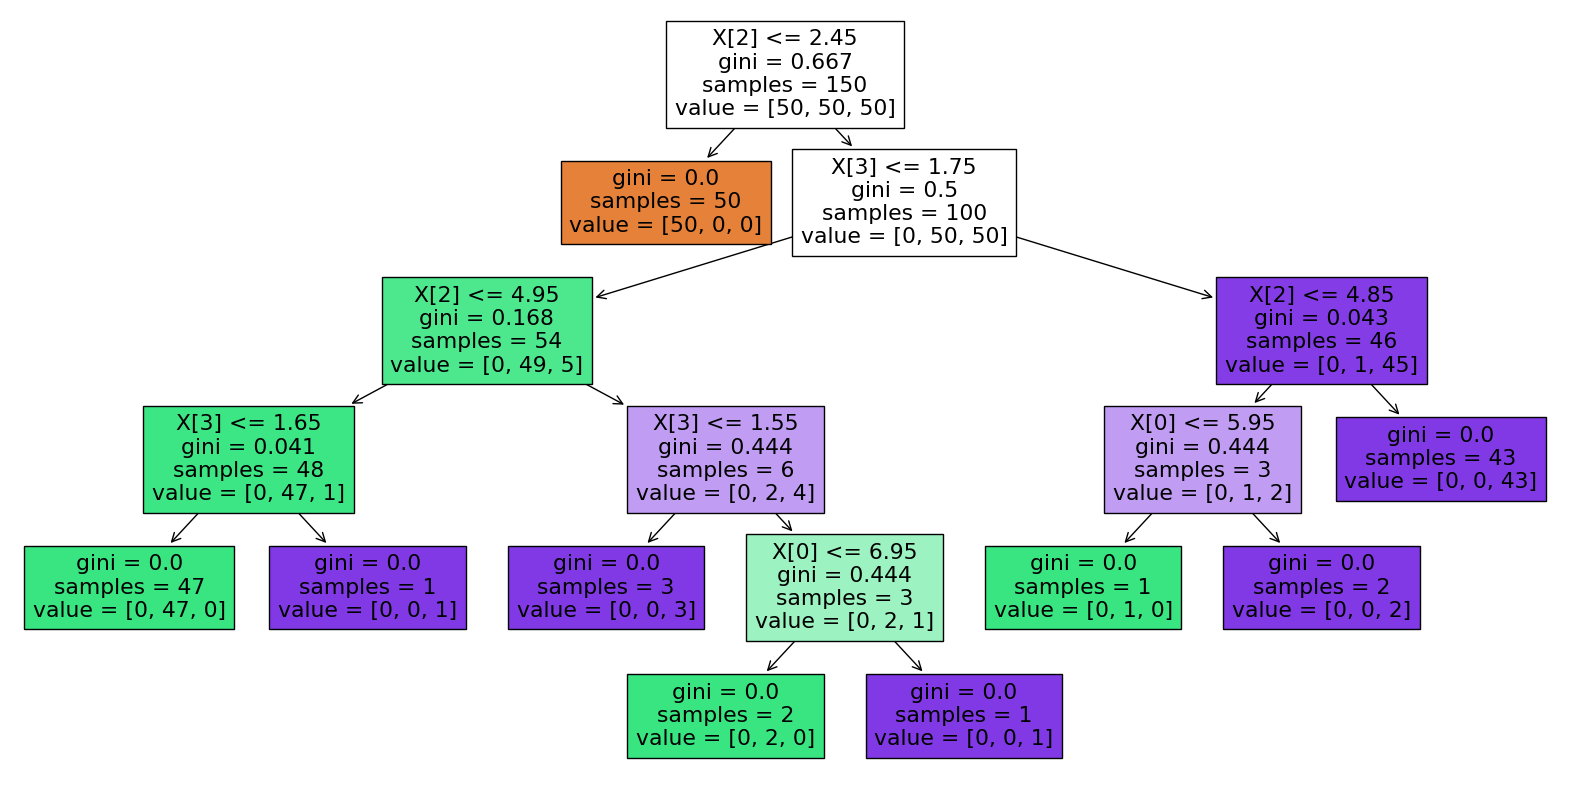

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
t = tree.plot_tree(clf.fit(X, y), filled=True)

의사결정나무는 스무고개와 같다.

꼬리를 무는 질문(조건)에 따라서 예측값이 가지 형태로 나뉜다.

### iris dataset

In [11]:
iris = load_iris()

In [10]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [12]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### graphviz를 활용한 시각화

In [13]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render('iris')

'iris.pdf'

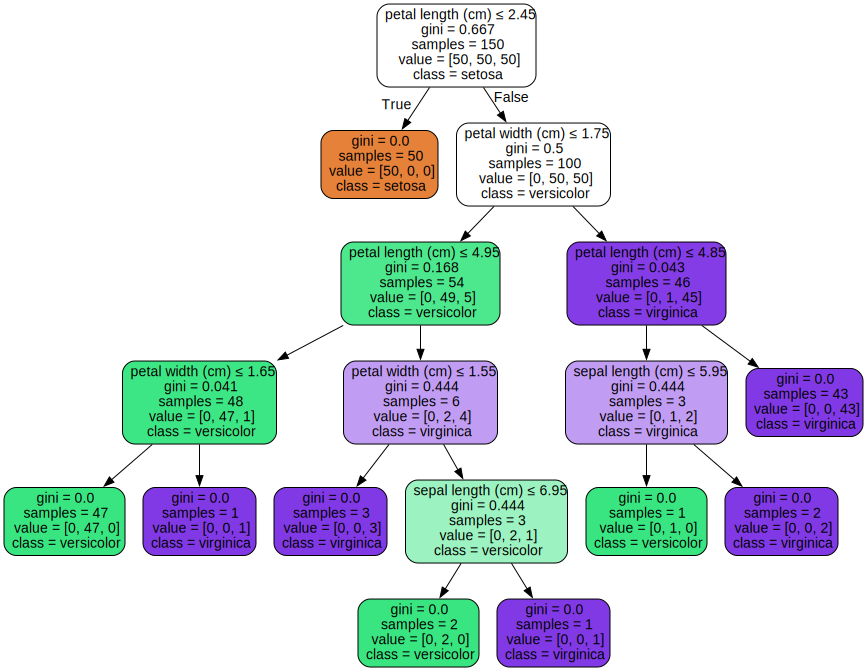

In [14]:
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=iris.feature_names,
                                class_names=iris.target_names,
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

## Pima indian dataset
**서구화로 인한 Pima indian들의 당뇨병 발병에 대한 dataset[1]**

**변수(9columns)**
- Pregnancies : 임신 횟수
- Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도
- BloodPressure : 이완기 혈압 (mm Hg)
- SkinThickness : 삼두근 피부 주름 두께 (mm), 체지방을 추정하는데 사용되는 값
- Insulin : 2시간 혈청 인슐린 (mu U / ml)
- BMI : 체질량 지수 (체중kg / 키(m)^2)
- DiabetesPedigreeFunction : 당뇨병 혈통 기능
- Age : 나이
- **Outcome(예측 타겟값)** : 768개 중에 268개의 결과 클래스 변수(0 또는 1)는 1이고 나머지는 0입니다.

[1]:https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

### 필요한 라이브러리 로드

In [15]:
# pandas(데이터분석)
# numpy(수치계산)
# seaborn, matplotlib.pyplot(시각화)

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### dataset 불러오기

In [16]:
df = pd.read_csv('data/diabetes.csv')
df.shape

(768, 9)

In [17]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### 학습, 예측 dataset 나누기

In [18]:
# 8:2 비율
# 전체 데이터의 행에서 80% 위치에 해당하는 index 값을 split_count 변수에 담아주기

split_count = int(df.shape[0] * 0.8)
split_count

614

In [19]:
# train, test로 슬라이싱을 통해 데이터 나누기

train = df[:split_count].copy()
train.shape

(614, 9)

In [20]:
test = df[split_count:].copy()
test.shape

(154, 9)

### 학습, 예측에 사용할 변수(컬럼)

In [21]:
# feature_names 라는 변수에 학습과 예측에 사용할 컬럼명을 가져오기
# -1까지 슬라이싱한 이유는 마지막 Outcome은 예측할 타겟값이기 때문에 제외하기 위해

feature_names = train.columns[:-1].tolist()
feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

### 정답값이자 예측해야 될 값

In [22]:
# label_name 이라는 변수에 예측할 컬럼 이름을 담기

label_name = train.columns[-1]
label_name

'Outcome'

❓ **feature_names는 list, label_name은 str인 이유**
- 여러 개의 변수(feature_names)를 활용하여 단일 변수(label_name)의 값을 예측하는 것이기 때문
- 간단하게, 여러 개와 한 개의 차이

### 학습, 예측 dataset 만들기

In [23]:
# 학습 세트 만들기 (기출)

X_train = train[feature_names]
print(X_train.shape)
X_train.head()

(614, 8)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [24]:
# 정답 값을 만들기 (기출의 정답)

y_train = train[label_name]
print(y_train.shape)
y_train.head()

(614,)


0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

**X_train(기출, 행렬 형태), y_train(기출의 정답, 벡터 형태)**

❗️ 기출 행의 수, 정답 행의 수는 같음

In [25]:
len(X_train) == len(y_train)

True

In [26]:
# 예측 세트 만들기 (시험)

X_test = test[feature_names]
print(X_test.shape)
X_test.head()

(154, 8)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
614,11,138,74,26,144,36.1,0.557,50
615,3,106,72,0,0,25.8,0.207,27
616,6,117,96,0,0,28.7,0.157,30
617,2,68,62,13,15,20.1,0.257,23
618,9,112,82,24,0,28.2,1.282,50


In [27]:
# 예측의 정답값을 만들기 (시험의 정답)

y_test = test[label_name]
print(y_test.shape)
y_test.head()

(154,)


614    1
615    0
616    0
617    0
618    1
Name: Outcome, dtype: int64

In [28]:
len(X_test) == len(y_test)

True

**실전에서는 정답을 알 수 없지만, 모델의 성능 측정을 위한 정답 값을 만들어 준 것**

이때, test와 train의 컬럼은 같은 수에 같은 것 이어야함

### 머신러닝 알고리즘 가져오기

In [29]:
# 당뇨병인지 아닌지 여부 판별 문제는 분류 Classifier

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model

DecisionTreeClassifier()

### 학습(훈련)
- 시험을 보기 전, 기출(X_train)과 정답(y_train)을 보고 공부하는 과정과 유사함

In [30]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

### 예측
- 실전 시험(X_test)라고 보면 됨
- 우리가 정답을 직접 예측하는 과정

In [31]:
y_predict = model.predict(X_test)
y_predict[:5]

array([1, 0, 1, 0, 1])

실전 시험이기 때문에 X(문제 parameter)만 들어간 것이다.(정답은 추후에 예측값과 비교)

### 트리 알고리즘 분석하기
- 의사결정나무 시각화

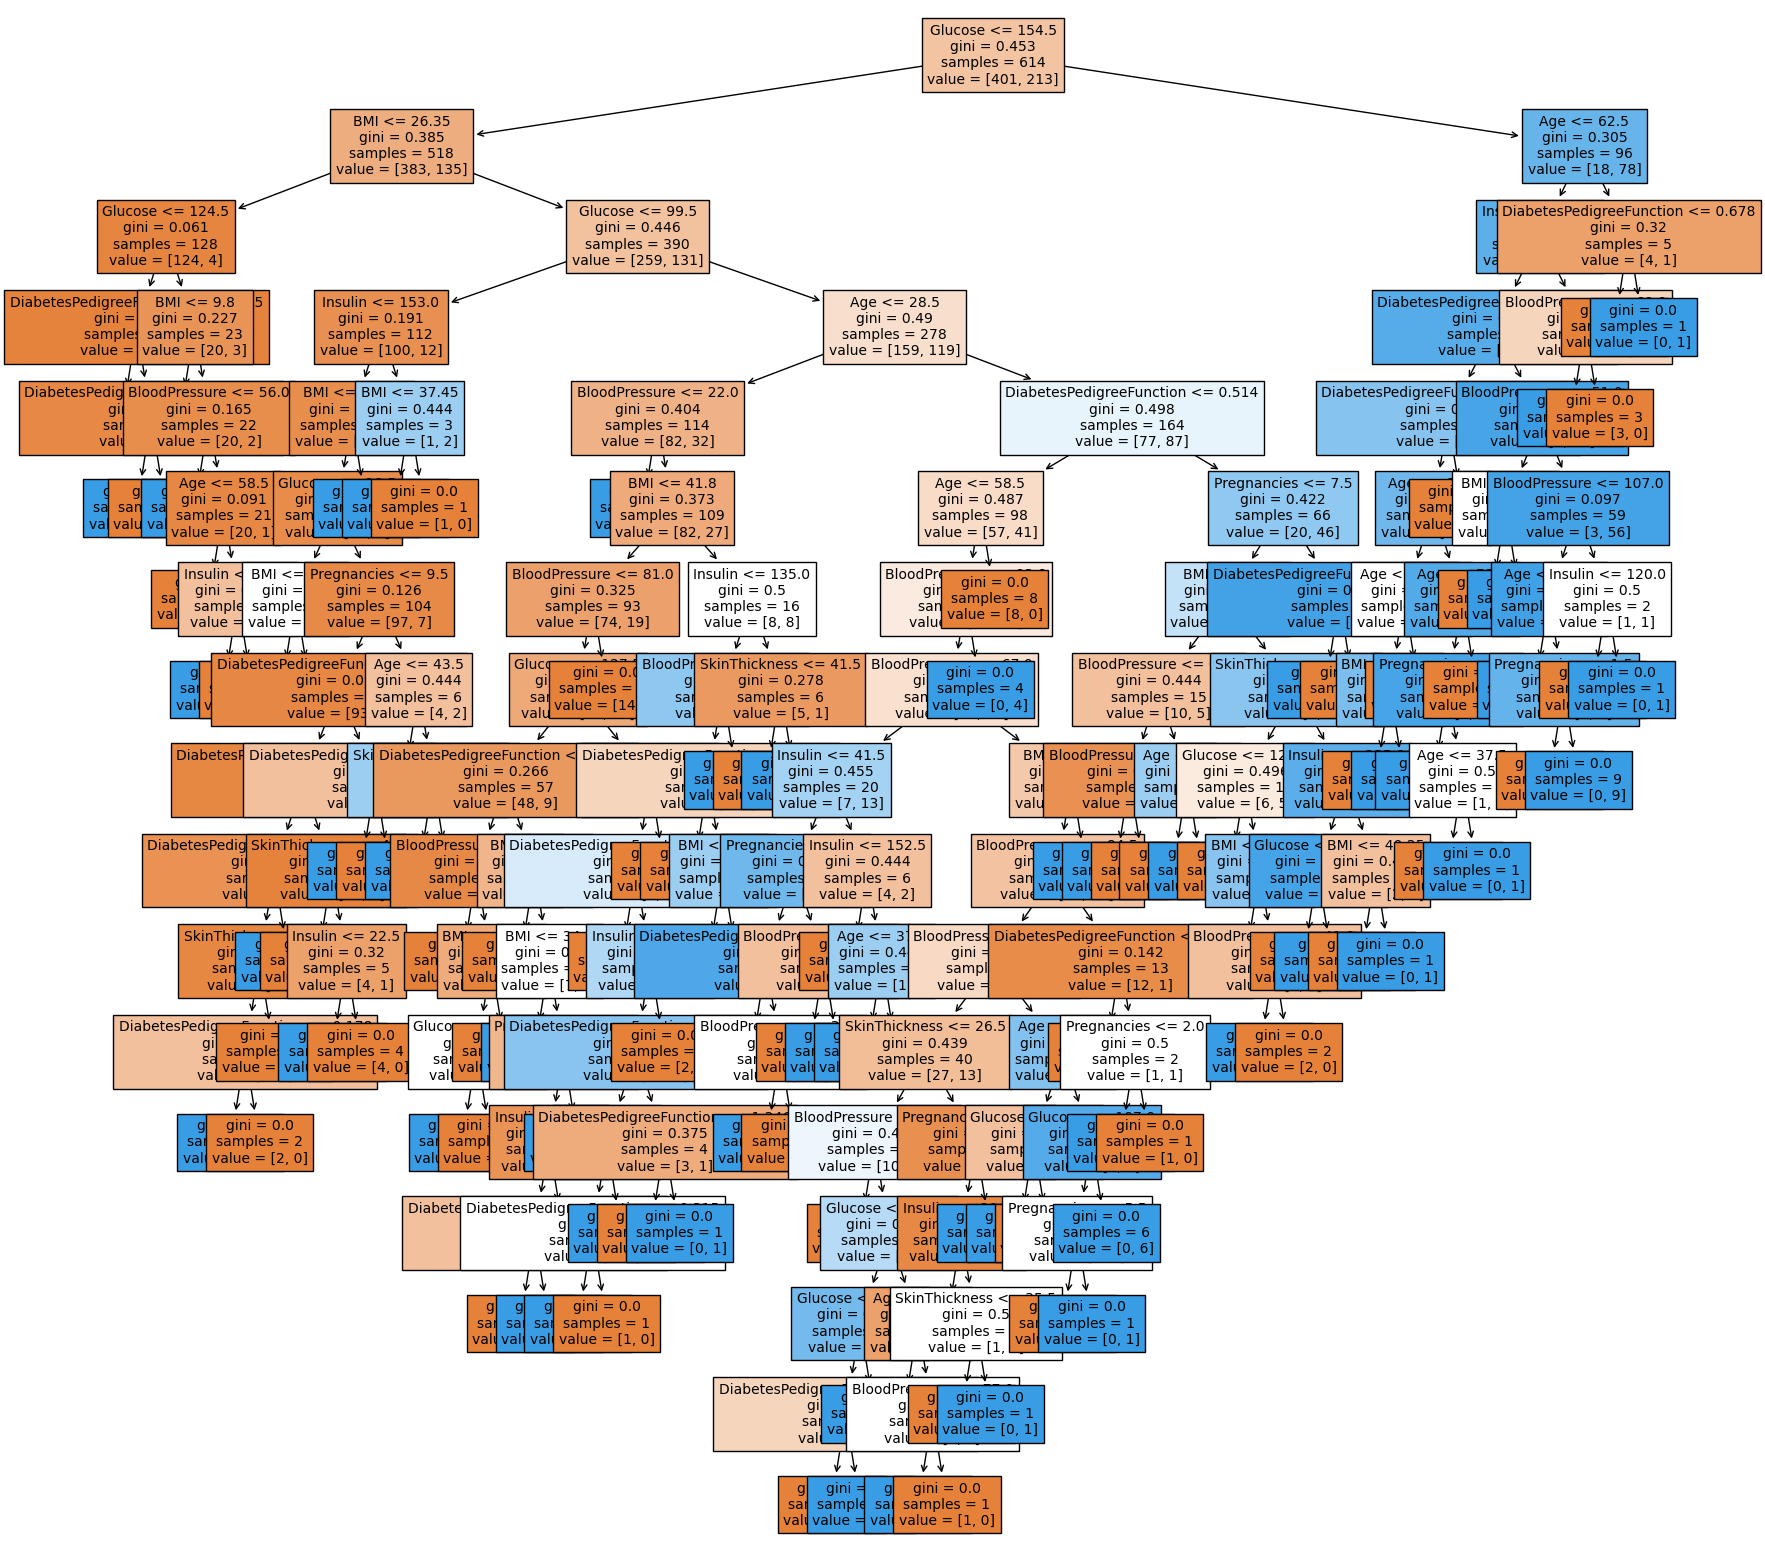

In [32]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 20))
tree = plot_tree(model,
                feature_names=feature_names,
                filled=True,
                fontsize=10)

가장 위(root)에 위치한 **Glucose가 Outcome에 영향을 주는 가장 중요한 변수**임을 확인할 수 있음

`plot_tree`로 시각화가 가능하지만, 겹쳐서 보이거나 작게 보이기 때문에 직관적이지 않음

### graphviz로 시각화

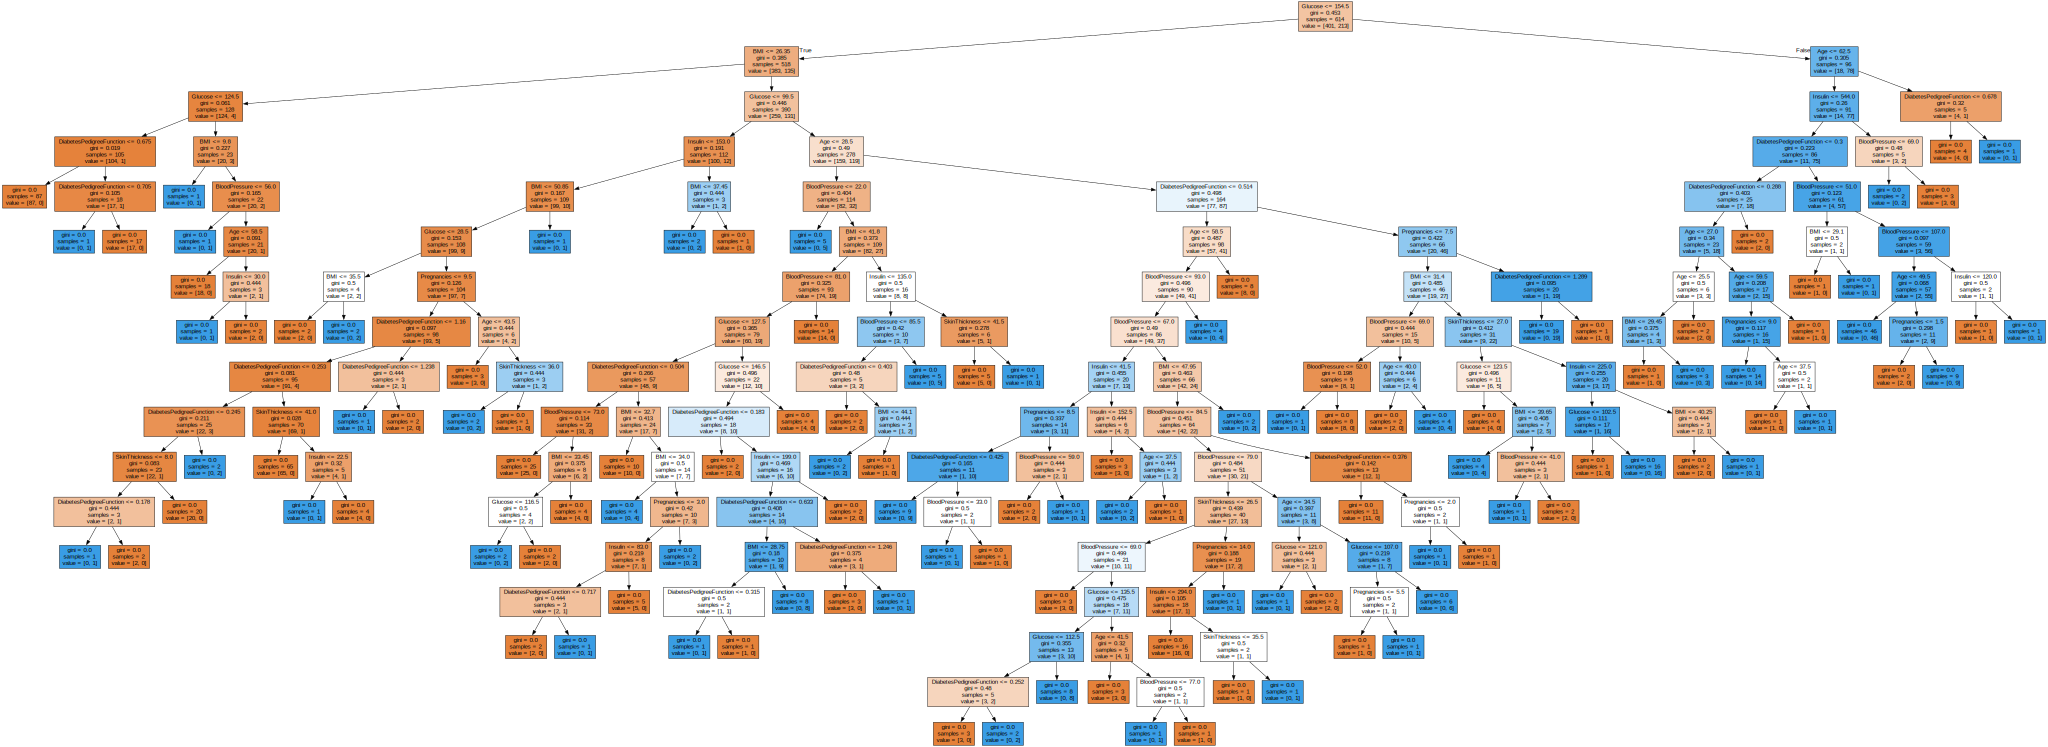

In [33]:
import graphviz
from sklearn.tree import export_graphviz

dot_tree = export_graphviz(model,
                          feature_names=feature_names,
                          filled=True)
graphviz.Source(dot_tree)

### Overfitting
- Tree의 가지가 내려갈수록 데이터가 train 데이터에 집중해서 학습하는 경향이 나타남
- 이를 방지하기 위해 트리의 깊이를 제한하기도 함

### 피처의 중요도 추출하기
- 우리가 위에서 지정한 feature의 순서대로 중요도가 출력됨

In [34]:
model.feature_importances_

array([0.05904079, 0.30805176, 0.1286525 , 0.03833555, 0.06516824,
       0.16388649, 0.13183096, 0.1050337 ])

### 피처의 중요도 시각화하기
- Glucose가 당뇨병을 예측하는 데에 가장 중요한 변수임을 알 수 있음
- 인슐린이 의외로 중요도가 낮은 것으로 나옴(추후에 이 중요도가 유의미한지 검정해볼 수 있음)

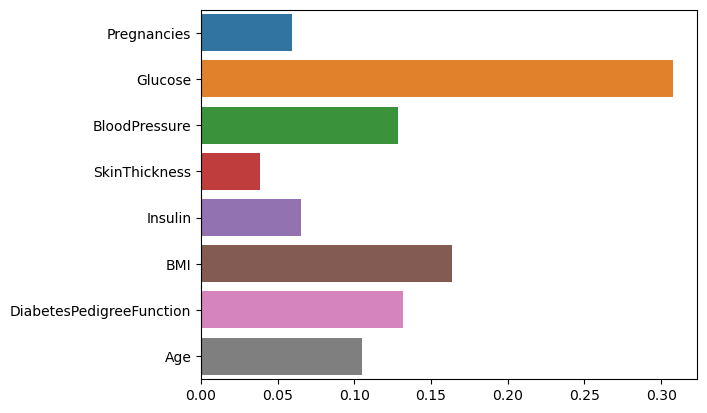

In [35]:
sns.barplot(x=model.feature_importances_, y=feature_names);

### 정확도(Accuracy) 측정하기
- 갯수 구하기 : `abs()`, `sum()`
- 정확도 구하기
- 알고리즘을 통해 구하기 : `sklearn.metrics` `accuracy_score`
- 메서드를 통해 구하기 : `model.score()`

In [36]:
# 예측값 갯수 구하기
# 실제값 - 예측값을 빼주면 같은 값은 0으로 나오게 됨
# 여기에서 절대값을 씌운 값이 1인 값이 다르게 예측한 값이 됨
# sum()을 통해 다르게 예측한 값의 갯수를 확인할 수 있음 (41개)

diff_count = abs(y_test - y_predict).sum()
diff_count

41

❗️ Tree 모델은 돌릴 때마다 예측값이 변하기 때문에 diff_count 또한 고정된 것은 아니다.

In [37]:
# 예측의 정확도를 구하기
# 100점 만점 중에 몇 점을 맞았는지 구하는 것

(len(y_test) - diff_count) / len(y_test) * 100

73.37662337662337

In [38]:
# 알고리즘을 통해 구하기

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict) * 100

73.37662337662337

In [40]:
# model의 score 메서드로 구하기
# 정답 값을 알고 있을 때만 계산 가능

model.score(X_test, y_test) * 100

73.37662337662337

## 정리하기
이번 실습에서는 아무런 전처리를 하지 않고, 8:2 비율로 train과 test를 나누고 의사결정 나무를 돌려보고 정확도 약 75%를 얻어내었다.

모델을 개선하면 정확도를 더 올릴 수가 있는데, EDA를 통한 전처리가 필요하다.

**EDA를 충분히 한다면 어떤 feature를 어떻게 사용할지 판단을 내릴 수 있다.**